## Installing required packages
Install nltk, pandas, gensim packages by performing the following commands in the terminal or command prompt:
`pip install --upgrade nltk pandas gensim`
or
`conda install nltk pandas gensim`
based on the python environment of your choice

In [2]:
import numpy as np
from nltk.tokenize import WordPunctTokenizer
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("./train.csv")
df.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [4]:
print("Total records in the data frame: {}" .format(df.shape[0]))

Total records in the data frame: 6079


In [5]:
x_columns = list()
x_columns.append("qa_id")

for x in df.columns.values[1:].tolist()[0:10] :
    x_columns.append(x)

y_columns = df.columns.values[1:].tolist()[10:40]
# print(df.columns.values[1:][0:10])
print(x_columns)

['qa_id', 'question_title', 'question_body', 'question_user_name', 'question_user_page', 'answer', 'answer_user_name', 'answer_user_page', 'url', 'category', 'host']


In [6]:
def returnColumn(x, start, stop) :
    return list(x[start:stop])

In [7]:
X = list()
for row in df.values :
    X.append(returnColumn(row, 0, 11))
X = pd.DataFrame(X, columns=x_columns)
X.head()
X.shape

(6079, 11)

In [8]:
Y = list()
for row in df.values:
    Y.append(returnColumn(row, 11, 41))
Y = pd.DataFrame(Y, columns=y_columns)
Y.head()
Y.shape

(6079, 30)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(4863, 11) (4863, 30)
(1216, 11) (1216, 30)


In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saroopa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords

In [13]:
stopwords=stopwords.words('english')
q_body_stopwords = X_train['question_body'].apply(lambda x : [x for x in x.split() if x in stopwords])
answer_stopwords = X_train['answer'].apply(lambda x: [x for x in x.split() if x in stopwords])

Text(0.5, 1.0, 'Distribution of stopwords in  Answer')

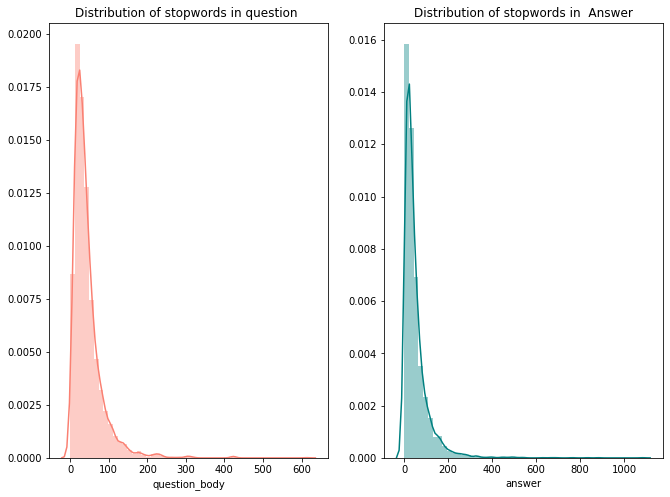

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(11,8))
words = q_body_stopwords.apply(lambda x : len(x))
sns.distplot(words,color='salmon',ax=ax1)
ax1.set_title('Distribution of stopwords in question ')
words = answer_stopwords.apply(lambda x: len(x))
sns.distplot(words,color='teal',ax=ax2)
ax2.set_title('Distribution of stopwords in  Answer')

In [15]:
from sklearn.manifold import TSNE

words = large_model.index2word
wvs = large_model[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

NameError: name 'large_model' is not defined

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

NameError: name 'T' is not defined

### Remove stop-words from the corpus

In [17]:
from gensim.parsing.preprocessing import remove_stopwords

In [18]:
q_title_no_sw = list()
for x in X_train["question_title"] :
    q_title_no_sw.append(remove_stopwords(x))

q_body_no_sw = list()
for x in X_train["question_body"] :
    q_body_no_sw.append(remove_stopwords(x))

answer_no_sw = list()
for x in X_train["answer"] :
    answer_no_sw.append(remove_stopwords(x))

### Create object for word Tokenizer

In [19]:
tokenizer = WordPunctTokenizer()

### Create tokenized lists of question_title, question_body and answer

In [20]:
tokenized_q_title = list()
for line in q_title_no_sw:
    tokenized_q_title.append(tokenizer.tokenize(line.lower()))

tokenized_q_body = list()
for line in q_body_no_sw:
    tokenized_q_body.append(tokenizer.tokenize(line.lower()))

tokenized_answer = list()
for line in answer_no_sw:
    tokenized_answer.append(tokenizer.tokenize(line.lower()))

In [21]:
# Checking if the answer block is well tokenized
print(tokenized_answer[34])

['^\\', 'd', '{', '6', '}$', '^\\', 'd', '{', '6', '}\\.\\', 'd', '{', '3', '}$', 'correct', 'patterns', 'test', '6', 'digits', '6', 'digits', 'dot', '3', 'digits', '.', '^\\', 'd', '{', '6', '}((\\.\\', 'd', '{', '3', '}$)|$)', 'match', '6', 'digits', '6', 'digits', 'dot', '3', 'digits', 'rubular', 'friend', '!']


In [22]:
# Joining the tokenized answer
print(' '.join(tokenized_answer[34]))

^\ d { 6 }$ ^\ d { 6 }\.\ d { 3 }$ correct patterns test 6 digits 6 digits dot 3 digits . ^\ d { 6 }((\.\ d { 3 }$)|$) match 6 digits 6 digits dot 3 digits rubular friend !


### Using Word2Vec model for vectorization

In [23]:
from gensim.models import Word2Vec

In [49]:
q_body_vec_model = Word2Vec(tokenized_q_body, size=50, min_count=5, window=6).wv

In [25]:
type(q_body_vec_model)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [45]:
q_body_vec_model.get_vector("camera")       # Some random word in the question_title column in the dataset

array([-0.36351445, -0.35452095,  0.22283933,  0.31311524,  0.07523335,
       -0.14339022, -0.33362296, -0.74289685,  0.34373316, -1.34552   ,
        0.41951254,  0.7550807 , -0.4391045 , -0.485285  , -0.5882479 ,
        0.29958192, -0.39417395,  0.5504969 , -0.26450375, -0.23804924,
       -0.0434348 ,  0.04130911, -0.27533448,  0.47874242,  0.5279981 ,
        0.21364197,  0.10739592, -0.84176123, -0.2155348 , -0.07324989,
       -0.45407534, -0.11317968,  0.41914245, -0.8055576 , -0.46178186,
       -0.25659814,  0.5846317 , -1.1006354 , -0.9910531 ,  0.09821667,
       -0.5232139 ,  0.68689054,  0.20765202, -0.03487774, -0.08196967,
       -0.24486469,  0.250682  , -0.3715218 ,  0.266728  ,  0.33336943],
      dtype=float32)

In [50]:
q_body_vec_model.most_similar("local")

[('cache', 0.9220937490463257),
 ('mysql', 0.8779181838035583),
 ('mysite', 0.8751153945922852),
 ('localhost', 0.8666144609451294),
 ('quicksand', 0.8592592477798462),
 ('uploader', 0.8573800325393677),
 ('www', 0.8504911065101624),
 ('link', 0.8445355296134949),
 ('https', 0.839586615562439),
 ('admin', 0.839346170425415)]

In [52]:
all_sentences = list()      # All corpus available in the dataset

for line in tokenized_q_title:
    all_sentences.append(line)

for line in tokenized_q_body:
    all_sentences.append(line)

for line in tokenized_answer:
    all_sentences.append(line)

# print(all_sentences[100])

In [53]:
large_model = Word2Vec(all_sentences, size=50, min_count=5, window=6).wv

In [54]:
large_model.get_vector("framework")

array([-0.23814528,  0.21843798, -0.3738899 , -0.31246483, -0.31021506,
       -0.12705563, -0.00626735, -0.7852826 , -0.00530614, -0.597279  ,
        0.25069052,  0.54439646, -0.00799162, -0.2163775 , -0.10519774,
       -0.06558315,  0.08021291, -0.15080427, -0.33409932, -0.143863  ,
       -0.41443202, -0.17528284, -0.06276369,  0.2310541 ,  0.21606945,
       -0.08775005, -0.5025281 , -0.02173813, -0.16491978, -0.52107126,
       -0.05704394,  0.4463818 , -0.36559767, -0.18459445,  0.07561321,
       -0.80684876,  0.01080128, -0.4379101 , -0.22155052, -0.03641842,
        0.10467532,  0.2659673 , -0.01758988, -0.15128873,  0.19123386,
        0.11791681,  0.11081734, -0.16908473, -0.06797242, -0.22574447],
      dtype=float32)

In [55]:
large_model.most_similar("local")
# large_model.most_similar(positive=["project"], negative=["wordpress"])

[('share', 0.8844317197799683),
 ('library', 0.8697836399078369),
 ('plugins', 0.86845862865448),
 ('wp', 0.8658227324485779),
 ('directory', 0.85992431640625),
 ('mysql', 0.8585861921310425),
 ('media', 0.8582724332809448),
 ('shared', 0.857431173324585),
 ('lable', 0.8505437970161438),
 ('sound_notifier', 0.8467066287994385)]

In [14]:
# Select the 1000 most frequently used words and sort them in descending order based on their frequency of usage
words = sorted(model.vocab.keys(), key=lambda word: model.vocab[word].count, reverse=True)[:1000]

print(words[::100])

['.', 'up', 'very', 'did', 'option', 'save', 'property', 'problems', 'packages', 'vector']


In [58]:
def find_norm_of_word(word) :
    norm = 0
    for x in large_model.get_vector(word) :
        norm = norm + x**2
    return norm**(1/2)

In [59]:
def find_norm_of_document(doc) :
    norm = 0
    for x in doc :
        norm = norm + x**2
    return norm**(1/2)

In [61]:
find_norm_of_word('local')

8.39106185486288

In [62]:
find_norm_of_document(['the', 'local', 'repository', 'error'])

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'